## Spectral Line Modeling Tools

Rich and I have written a code that "simply" models the spectral line emission from a disk (it's not that simple, but it is considerably faster and less-sophisticated than the alternatives).  This notebook shows how it's used, and should help you get a better feel for why the data looks like it does.  

First, instantiate the `simple_disk` class:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from simple_disk import simple_disk

To start a model, we need to specify a few things.  First, we need to define the geometrical properties of the disk, such as the inclination, `inc`, and position angle, `PA`, both in degrees.  The position angle is measured as the angle between the red-shifted major axis and North, measured from North to East (which is up to left in plots of astronomical images).  Inclination is the tilt of the disk toward our line of sight: inc=0 implies "face-on" (birds-eye view), and inc=90 is "edge-on".

In [2]:
disk = simple_disk(inc=30., PA=45.)

This will set things up with a ton of default-ed parameter values.  We'll explore those below.  But first, it's worth reviewing the coordinate systems.

### Coordinate Systems

There are two relevant coordinate systems: the sky-frame and disk-frame.  The sky-frame coordinates will always be in arcseconds while the disk-frame coordaintes will be in AU (= 1.496e13 cm).  The number of pixels you have along each dimension is given by the `Npix` argument when intitializing `simple_disk`, while the field of view, `FOV`, and source distance, `dist`, parameters will dictate the size of the image.

You can always change the number of pixels or field of view:

In [3]:
# change field of view
disk.set_coordinates(FOV=8.0, Npix=128)

which will recalculate all the deprojected pixel values.

The disk-frame (Cartesian) coordinates can be accessed by

In [4]:
x = disk.x_disk
y = disk.y_disk

In [5]:
print(x.shape)

(128, 128)


with corresponding axes

In [6]:
xaxis = disk.xaxis_disk
yaxis = disk.yaxis_disk

In [7]:
print(yaxis.shape)

(128,)


If you're using `imshow`, you can access the disk extent with

In [8]:
extent = disk.extent_disk

although a helper function, `disk.format_disk_plot(ax=ax)`, will apply the appropriate axis limits to `ax` for a disk-frame projection.

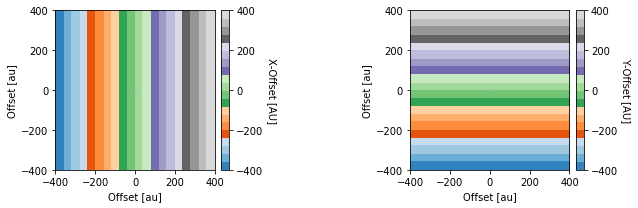

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.x_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('X-Offset [AU]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.y_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Y-Offset [AU]', rotation=270, labelpad=13)

plt.tight_layout()

The sky-plane coordinates can be accessed in a similar way:

In [10]:
x = disk.x_sky
y = disk.y_sky

Both of these are two-dimensional arrays with the pixel values. If you need the axes for plotting then you can use:

In [11]:
xaxis = disk.xaxis_sky
yaxis = disk.yaxis_sky

and for `imshow` plotting,

In [12]:
extent = disk.extent_sky

**Note**: When plotting in the sky-plane, you'll need to flip the x-axis to account for the on-sky projection (i.e., because E is to the left).

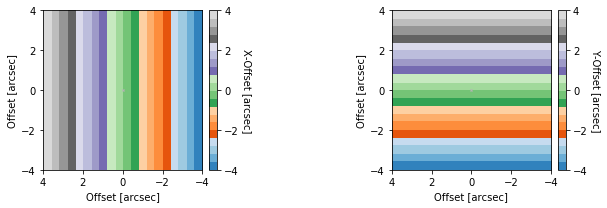

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.x_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('X-Offset [arcsec]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.y_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Y-Offset [arcsec]', rotation=270, labelpad=13)

plt.tight_layout()

**ASIDE**: I don't think I've ever told you this, but there's a helpful conversion between these coordinate frames, at least in projection.  Offsets in arcseconds correspond to offsets in AU divided by the distance in parsecs (pc).  (1 pc = 3.09e18 cm = 3.26 light years)

Both sky- and disk-frame coordinates have associated polar coordinates, `disk.r_*` and `disk.t_*`, where the polar angles are in radians, and the radial coordiantes are in arcseconds for sky-frame and AU for disk-frame.  Given the disk geometry, these are often more logical ways to consider the coordinate frames.

In [14]:
print(disk.r_sky)

[[565.68542495 561.25477579 556.87200823 ... 642.97241011 648.06928641
  653.19726474]
 [561.25477579 556.77699306 552.34672399 ... 637.7829622  642.91069364
  648.06928641]
 [556.87200823 552.34672399 547.86856117 ... 632.62412255 637.7829622
  642.97241011]
 ...
 [642.97241011 637.7829622  632.62412255 ... 547.86856117 552.34672399
  556.87200823]
 [648.06928641 642.91069364 637.7829622  ... 552.34672399 556.77699306
  561.25477579]
 [653.19726474 648.06928641 642.97241011 ... 556.87200823 561.25477579
  565.68542495]]


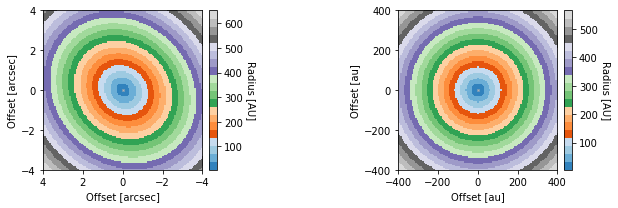

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.r_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Radius [AU]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.r_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Radius [AU]', rotation=270, labelpad=13)

plt.tight_layout()

**Note**: The disk polar angles are not the same as the position angle.

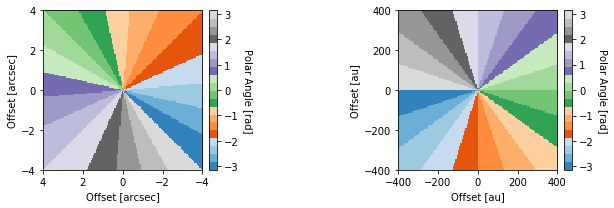

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.t_sky, origin='lower', extent=disk.extent_sky, cmap='tab20c')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Polar Angle [rad]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.t_disk, origin='lower', extent=disk.extent_disk, cmap='tab20c')
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Polar Angle [rad]', rotation=270, labelpad=13)

plt.tight_layout()

### Disk Properties

Now we will explore how we parameterize the disk model.  There are several important components involved, which we'll run through sequentially:

#### Velocity Field (Keplerian rotation)

Given the deprojected coordinates, it is simple to calculate the background keplerian rotation,
$$v_{\phi}(r) = \sqrt{\frac{GM_{\rm star}}{r}}$$
which is projected onto the sky via,
$$v_{\phi,\, {\rm proj}}(r,\, \phi) = \sqrt{\frac{GM_{\rm star}}{r}} \times \sin(i) \times \cos (\phi)$$

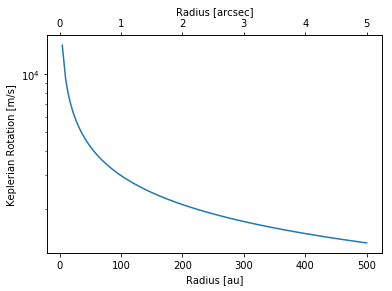

In [17]:
disk.plot_keplerian(logy=True)  # plot the Keplerian rotation profile

The stellar mass can be changed at any time through the `mstar` attribute,

In [18]:
disk.mstar = 1.0  # stellar mass in Msun

The projected rotation can be easily accessed by the `disk.v0_sky` property, with an equivalent array for the disk-frame coordinates, `disk.v0_disk`.

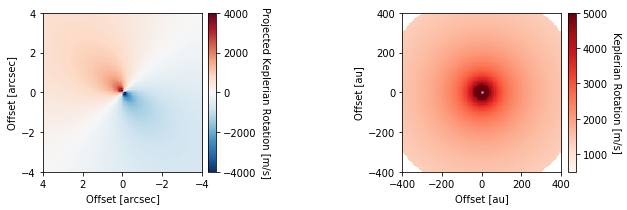

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 
ax = axs[0]  # Plot the x-axis offset.
im = ax.imshow(disk.v0_sky, origin='lower', extent=disk.extent_sky,
              cmap='RdBu_r', vmin=-4e3, vmax=4e3)
disk.format_sky_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Projected Keplerian Rotation [m/s]', rotation=270, labelpad=13)

ax = axs[1]  # Plot the y-axis offset.
im = ax.imshow(disk.v0_disk, origin='lower', extent=disk.extent_disk,
               cmap='Reds', vmin=5e2, vmax=5e3)
disk.format_disk_plot(ax)
cb = plt.colorbar(im, ax=ax, pad=0.02)
cb.set_label('Keplerian Rotation [m/s]', rotation=270, labelpad=13)

plt.tight_layout()

#### To make synthetic observations...

We need to describe some other properties.  But first, let's explain what the emission model is.  For simplicity, to start we are going to assume that the emission distribution is made up of Gaussian profiles,

$$
I_{\nu} = T_{\rm B} \times \exp \left[ -\left( \frac{v - v_0}{\Delta v} \right)^2 \right]. 
$$

The line center, $v_0$, is governed by the projected velocity field.  The emission is assumed to come from some vertical height above the disk midplane, `z_l`.  We'll get back to that later: first, we'll assume `z_l = 0` (this is the default).  

The line peak defaults to a simple radial power law,

$$
T_{\rm B} = T_{{\rm B},\,0} \times \left( \frac{r}{r_0} \right)^{-q_{T_{\rm B}}}
$$

where the appropriate parameters are `Tb0` and `Tbq`.  Note that `r0` is the radius where `Tb0` is defined; it defaults to 10 AU.  The outer boundary of the emission distribution is set by the parameter `r_l`: it defaults to 100 AU.  We can also define maximum and minimum temperature boundaries, with `Tbmax` and `Tbmin`.

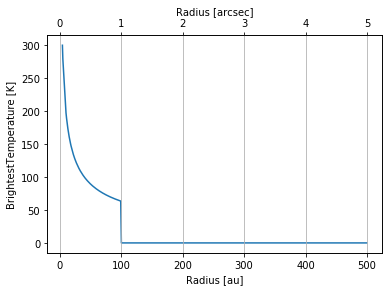

In [83]:
# set the brightness temperature profile and plot
disk.r_l = 100
disk.set_brightness(Tb0=200.0, Tbq=0.5, Tbmax=500)
disk.plot_brightness()
ax.set_xticks(np.arange(0, 500, 10))
ax.set_yticks(np.arange(0, 300., 10))
plt.grid(True, which='both')#color='black', linestyle='-', linewidth=1, which='both', )

The linewidth, $\Delta v$, has several default parameterizations.  The simplest is again just a radial power-law,

$$
\Delta v(r) = \Delta v_0 \times \left( \frac{r}{r_0} \right)^{q_{\Delta v}}
$$

where the appropriate parameters are `dV0`, `dVq`.  But usually we think of the linewidth as associated with the temperature structure.  The gas has some thermal contribution to the linewidth and a non-thermal one.  These are both thought to be proportional to the local sound speed, $c_s$,

$$
c_s(r) = \left( \frac{k T}{\mu_{\rm g} m_{\rm H}} \right)^{0.5}
$$

where $k$ is Boltzmann's constant, $\mu_{\rm g}$ is the mean molecular weight of the gas (= 2.37, which is an appropriate mix of H, He, and molecules), and $m_{\rm H}$ is the mass of a H atom.  In this preferred scenario, we associate $T$ with $T_B$ and let

$$
\Delta v(r) = \left[\frac{2 k T_b}{\mu_\ell m_{\rm H}} + (\xi \,  c_s)^2\right]^{0.5} = 
c_s \left[2 \frac{\mu_{\rm g}}{\mu_\ell} + \xi^2\right]^{0.5},
$$

where $\mu_\ell$ is the mean molecular weight of the molecule that's producing the spectral line (this defaults to CO, where $\mu_\ell = 28$) and $\xi$ is the fraction of the sound speed of the gas that's attributable to non-thermal motions (this is usually associated with turbulence).  So, the relevant parameter here is $\xi$, or `xi_nt`, which can vary from 0 to 1 (and is usually near 0).

**Note**: For the linewidth we use the Doppler width, not the FWHM or standard deviation of the Gaussian.
These can be specified when you instantiate the simple_disk class, or at any later point. Both these functions have the option to provide a maximum value which can be useful when using power laws which can lead to extremely large values at small $r$ values.

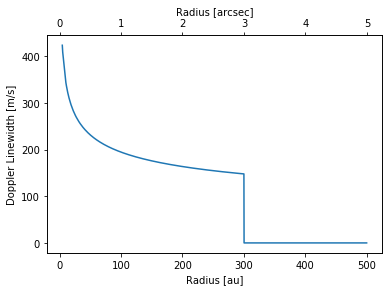

In [21]:
# set the linewidth profile and plot
disk.xi_nt = 0.05
disk.set_linewidth(dVmax=500)
disk.plot_linewidth()

### Making a Channel Map

So, now we've defined the model and can start making "observables" like channel maps.  These are defined in the native brightness temperature units.  

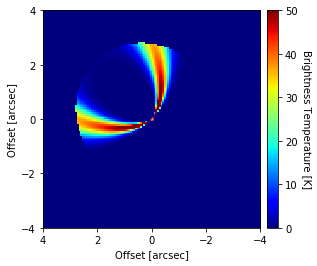

In [22]:
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(550.),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=50, cmap='jet')
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

We can crudely simulate the spatial response of the instrument by convolving with a Gaussian beam, with a FWHM specified by `bmaj`.  

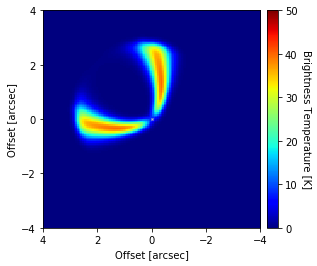

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(550., bmaj=0.3),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=50, cmap='jet')
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

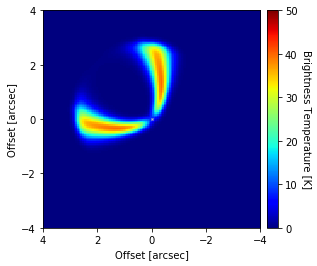

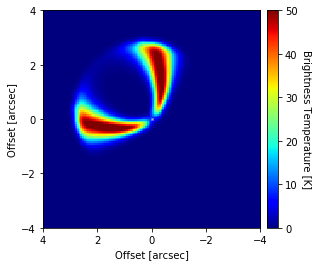

In [119]:
disk = simple_disk(inc=30, PA=45., mstar = 1, dist = 100.0, FOV=8.0, r_l=300, r0 = 10.0, xi_nt = 0.05, dVmax=500, Tb0=200.0, Tbq=0.5, Tbmax=500)
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(550., bmaj=0.3),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=50, cmap='jet')
disk.format_sky_plot(ax)
cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

disk = simple_disk(inc=30, PA=45., mstar = 1, dist = 100.0, FOV=8.0, r_l=300, r0 = 10.0, xi_nt = 0.05, dVmax=500, Tb0=200.0, Tbq=0.4, Tbmax=500)
fig, ax = plt.subplots()
im = ax.imshow(disk.get_channel(550., bmaj=0.3),
               origin='lower', extent=disk.extent_sky,
               vmin=0, vmax=50, cmap='jet')
disk.format_sky_plot(ax)

cb = plt.colorbar(im, pad=0.02)
cb.set_label('Brightness Temperature [K]', rotation=270, labelpad=13)

And finally, we can generate a series of channel maps (i.e., a cube):

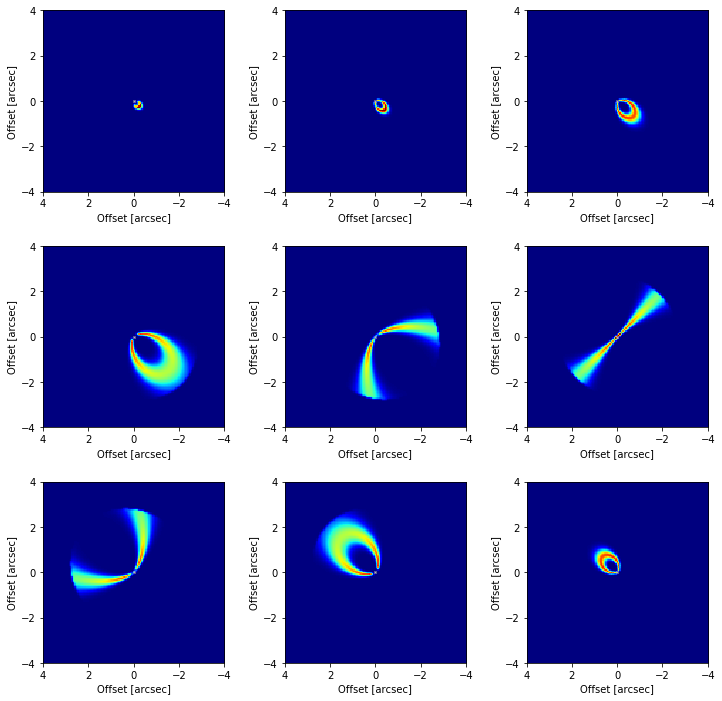

In [111]:
disk = simple_disk(inc=30, PA=45., mstar = 1, dist = 100.0, FOV=8.0, r_l=300, r0 = 10.0, xi_nt = 0.05, dVmax=500, Tb0=200.0, Tbq=0.5, Tbmax=500)
velax = np.arange(-2500, 2500, 500)  # velocity axis in [m/s]
cube = disk.get_cube(velax, bmaj=0.1)  # make the imagecube

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12), gridspec_kw=dict(wspace=0.3, hspace=0.3))
for a, ax in enumerate(axs.flatten()):
    ax.imshow(cube[a], origin='lower', extent=disk.extent_sky,
              vmin=0.0, vmax=75.0, cmap='jet')
    disk.format_sky_plot(ax)

**Your goals**: 
(1) Explore the parameters and gain some intuition to how they affect the observables.
(2) Write down the things that don't make sense, or that you think you understand but want to doublecheck.

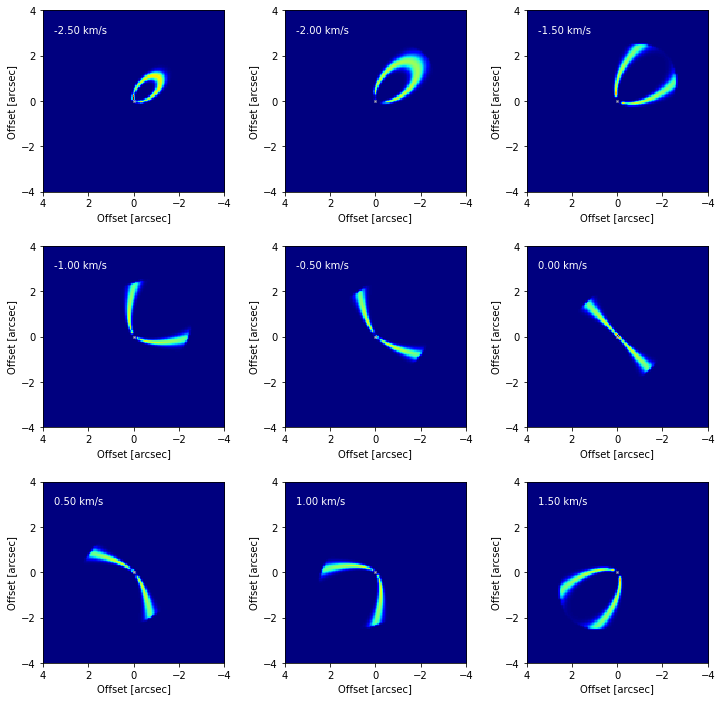

In [125]:
disk = simple_disk(inc=46.7, PA=133.3, mstar = 2.05, FOV=8.0, dist= 101.0, r_l=300, xi_nt = 0.2, dVmax=500, Tb0=200.0, Tbq=0.5, Tbmax=500)
velax = np.arange(-2500, 2500, 500)  # velocity axis in [m/s]
cube = disk.get_cube(velax, bmaj=0.1)  # make the imagecube

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12), gridspec_kw=dict(wspace=0.3, hspace=0.3))
for a, ax in enumerate(axs.flatten()):
    ax.imshow(cube[a], origin='lower', extent=disk.extent_sky,
              vmin=0.0, vmax=75.0, cmap='jet')
    disk.format_sky_plot(ax)
    # annotate with the velocity
    vel_str = '%.2f km/s' % (int(velax[a])/1000)
    ax.text(3.5, 3, vel_str, color='w');
    #print(velax[a])